<a href="https://colab.research.google.com/github/Shiva8164/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [ ]:
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_dataset.shape

(2290, 6)

In [ ]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

    1. Positive Correlation

    2. Negative Correlation

In [ ]:
correlation = gold_dataset.corr()

<ipython-input-14-a17bf32cf03a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

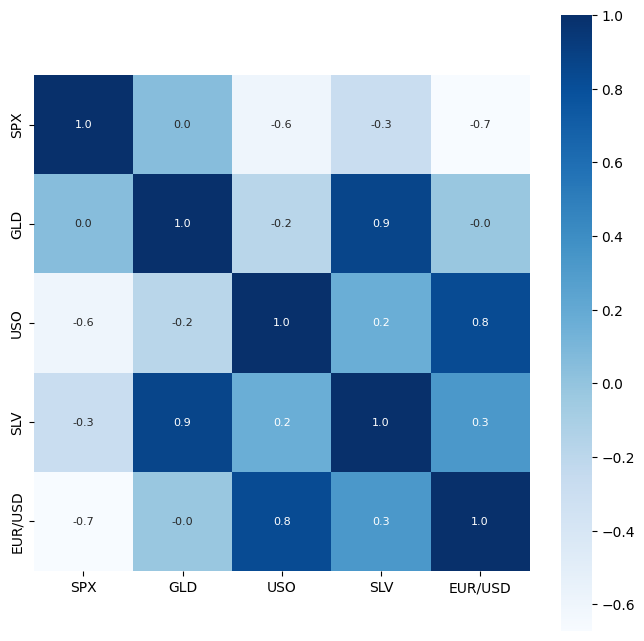

In [ ]:
# constructing the heat map to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


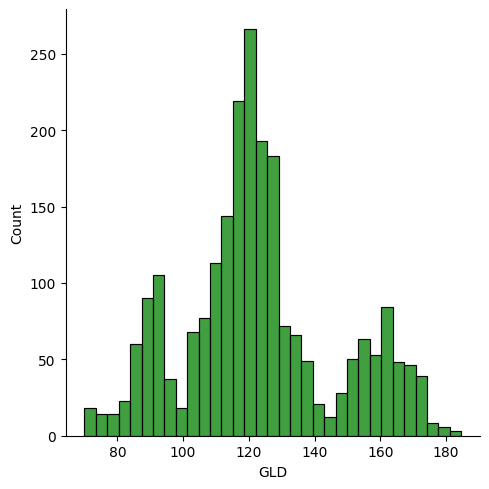

In [ ]:
# checking the distribution of the gold price
sns.displot(gold_dataset['GLD'], color = 'green')

In [ ]:
# splitting dataset in features and target
X = gold_dataset.drop(columns = ['Date', 'GLD'], axis = 1)
Y = gold_dataset['GLD']

In [ ]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# splitting into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [ ]:
# random forest training
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
X_test_prediction = model.predict(X_test)

print(X_test_prediction)


[168.52759892  81.96119991 115.98740001 127.56250067 120.74660096
 154.64349746 150.33109786 126.07190009 117.56909885 125.92480087
 116.81810103 171.97410046 141.67219853 167.87239835 115.16210002
 117.47980057 139.73610274 170.28330098 159.34030322 160.1425996
 155.25510031 125.29580034 175.6628001  157.23090364 125.12270049
  93.69350015  77.61559996 120.52090017 119.17699971 167.51060015
  88.18380073 125.33809976  91.27770068 117.71640006 121.13559953
 136.16990102 115.60030131 115.04350079 147.60759982 107.19030121
 104.26680225  87.14859812 126.39460041 117.9294     153.50639898
 119.7896998  108.38529974 108.05999802  93.06250024 127.12929777
  74.86540041 113.73869912 121.57079975 111.21919941 118.9777989
 120.80409933 159.65619989 167.34520128 147.05009687  86.04379875
  94.3065002   86.7935988   90.63770023 119.01950089 126.4193004
 127.61629998 169.94309966 122.29049919 117.3472989   98.54930059
 168.22250037 142.6471978  132.15600292 121.21340226 120.46629916
 119.88180064

Series([], Name: GLD, dtype: float64)

In [ ]:
# finding the R squared error
error_score = metrics.r2_score(Y_test, X_test_prediction)
print(error_score)

0.9893695225762646


Compare the actual values and the predicted values in the graph

In [ ]:
# converting the pandas series dataframe to list
Y_test = list(Y_test)

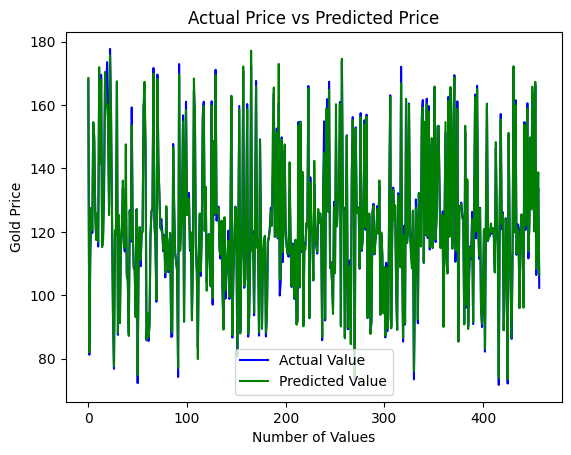

In [ ]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(X_test_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()